# RESNET

### Import Required Libraries

In [1]:
import numpy as np             
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras.applications.resnet import ResNet50
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import os
import matplotlib.image as mpimg
import cv2 

In [2]:
Resnet_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


### Add extra layers

In [3]:
result = Resnet_model.output
result = GlobalAveragePooling2D()(result)

# add a fully-connected layer
result = Dense(512, activation='relu')(result)

# and a fully connected output/classification layer
predictions = Dense(2, activation='sigmoid')(result)

In [4]:
resnet =Model(inputs=Resnet_model.input, outputs=predictions)

In [5]:
resnet.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

### Defining Data Paths

In [6]:
train_path = "C:/Users/Computing/Desktop/data-task1/train"
test_path = "C:/Users/Computing/Desktop/data-task1/test"
val_path = "C:/Users/Computing/Desktop/data-task1/val"

no_pneumonia


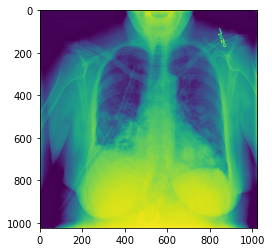

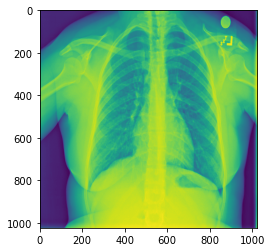

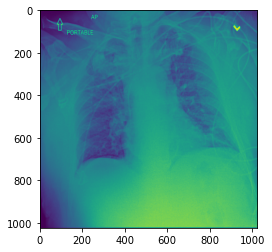

pneumonia


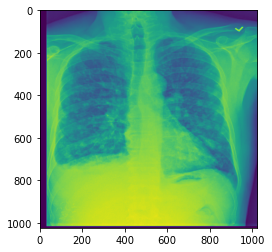

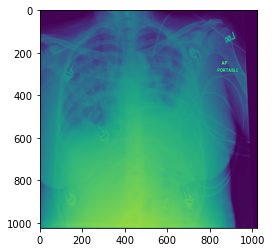

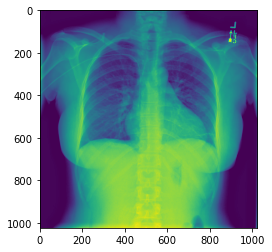

In [7]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    print(folder)
    for i in range(3):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        implot = plt.imshow(img)
        plt.show()

### Defining Target Variables

In [8]:
def data_class(data_path):
    datagen = ImageDataGenerator(rescale = 1./255)
    
    classes = datagen.flow_from_directory(data_path,
                                           target_size = (224, 224),
                                           batch_size = 16,
                                           class_mode = 'categorical')
    return classes

In [9]:
train_class = data_class(train_path)
test_class = data_class(test_path)
val_class = data_class(val_path)

Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

### Train model

In [11]:
history = resnet.fit(train_class, epochs=15, verbose = 1, validation_data = val_class)

Epoch 1/15
188/188 [==============================] - 402s 2s/step - loss: 0.4543 - accuracy: 0.7863 - val_loss: 0.5326 - val_accuracy: 0.7800
Epoch 2/15
188/188 [==============================] - 398s 2s/step - loss: 0.3873 - accuracy: 0.8287 - val_loss: 0.5436 - val_accuracy: 0.7280
Epoch 3/15
188/188 [==============================] - 415s 2s/step - loss: 0.3504 - accuracy: 0.8457 - val_loss: 0.5541 - val_accuracy: 0.7160
Epoch 4/15
188/188 [==============================] - 410s 2s/step - loss: 0.3028 - accuracy: 0.8800 - val_loss: 0.6410 - val_accuracy: 0.6380
Epoch 5/15
188/188 [==============================] - 407s 2s/step - loss: 0.2693 - accuracy: 0.8950 - val_loss: 0.5783 - val_accuracy: 0.7000
Epoch 6/15
188/188 [==============================] - 403s 2s/step - loss: 0.2319 - accuracy: 0.9143 - val_loss: 0.4991 - val_accuracy: 0.7740
Epoch 7/15
188/188 [==============================] - 410s 2s/step - loss: 0.1946 - accuracy: 0.9350 - val_loss: 0.4769 - val_accuracy: 0.8120

### VISUALIZATION

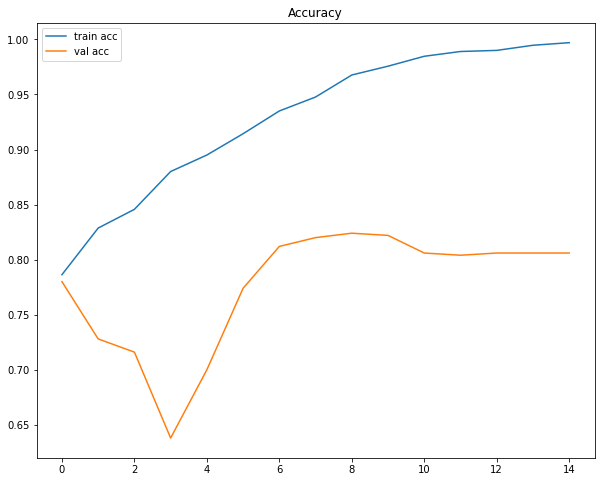

In [12]:
plt.figure(figsize=(10,8)) 
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

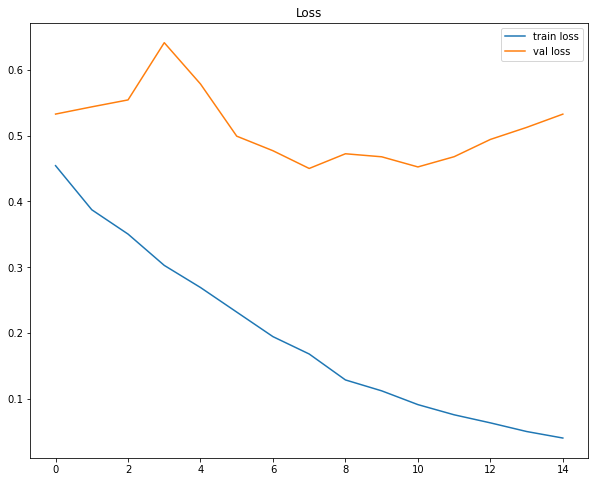

In [13]:
plt.figure(figsize=(10,8)) 
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

### Model Evaluation

In [14]:
result = resnet.evaluate(test_class)
print('Accuracy =',result[1]*100)
print('Loss =',result[0]*100)

32/32 [==============================] - 18s 546ms/step - loss: 0.5661 - accuracy: 0.8060
Accuracy = 80.59999942779541
Loss = 56.608372926712036


In [35]:
prediction = resnet.predict(test_class)

32/32 [==============================] - 15s 462ms/step


In [36]:
y_pred = np.argmax(prediction, axis=1)

### Classification Report

In [37]:
print(classification_report(y_pred, test_class.classes, target_names = ['No Pneumonia (Class 0)', 'Pneumonia (Class 1)']))

                        precision    recall  f1-score   support

No Pneumonia (Class 0)       0.85      0.78      0.81       426
   Pneumonia (Class 1)       0.12      0.18      0.15        74

              accuracy                           0.69       500
             macro avg       0.48      0.48      0.48       500
          weighted avg       0.74      0.69      0.71       500



### Confusion Matrix

In [38]:
cm = confusion_matrix(test_class.classes,y_pred)
cm
                                
print('True Positive  (TP) = ', cm[0][0])
print('False Positive (FP) = ', cm[0][1])
print('False Negative (FN) = ', cm[1][0])
print('True Negative  (TN) = ', cm[1][1])

True Positive  (TP) =  334
False Positive (FP) =  61
False Negative (FN) =  92
True Negative  (TN) =  13


### Precision Score, Recall Score, F1 score

In [39]:
if (cm[0][0] + cm[0][1])!=0 and (cm[0][0], cm[1][0])!=0:
      precision= round((cm[0][0] / (cm[0][0] + cm[0][1]))*100, 2) 
      recall   = round((cm[0][0] / (cm[0][0] + cm[1][0]))*100, 2) 
      f1_score = round(2*((precision*recall)/(precision+recall)), 2)       
      print(f'Precision Score: {precision}%')
      print(f'Recall Score: {recall}%')
      print(f'F1 Score: {f1_score}%')
      print('='*50) 
      print('\n')

Precision Score: 84.56%
Recall Score: 78.4%
F1 Score: 81.36%




### Plot Confusion Matrix

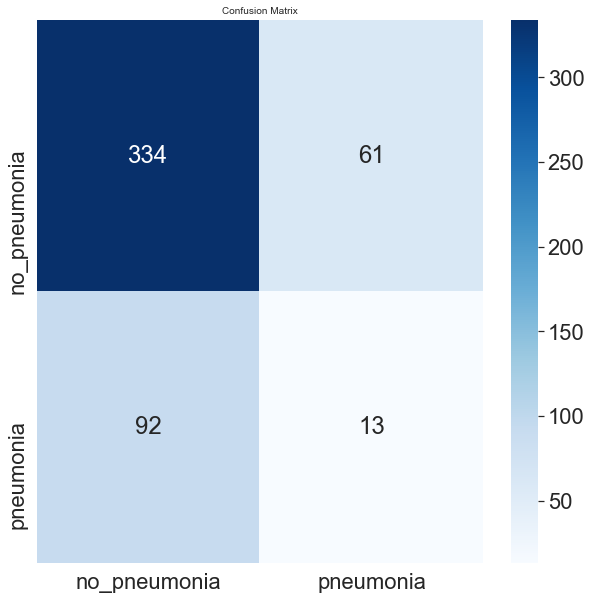

In [46]:
labels = ['no_pneumonia', 'pneumonia']

plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm,annot=True, fmt='g', cmap="Blues", ax=ax,xticklabels = labels,yticklabels = labels)

#titles
ax.set_title('Confusion Matrix', fontsize = 10);

### Predict Classes

(500, 224, 224, 3)
(500, 2)


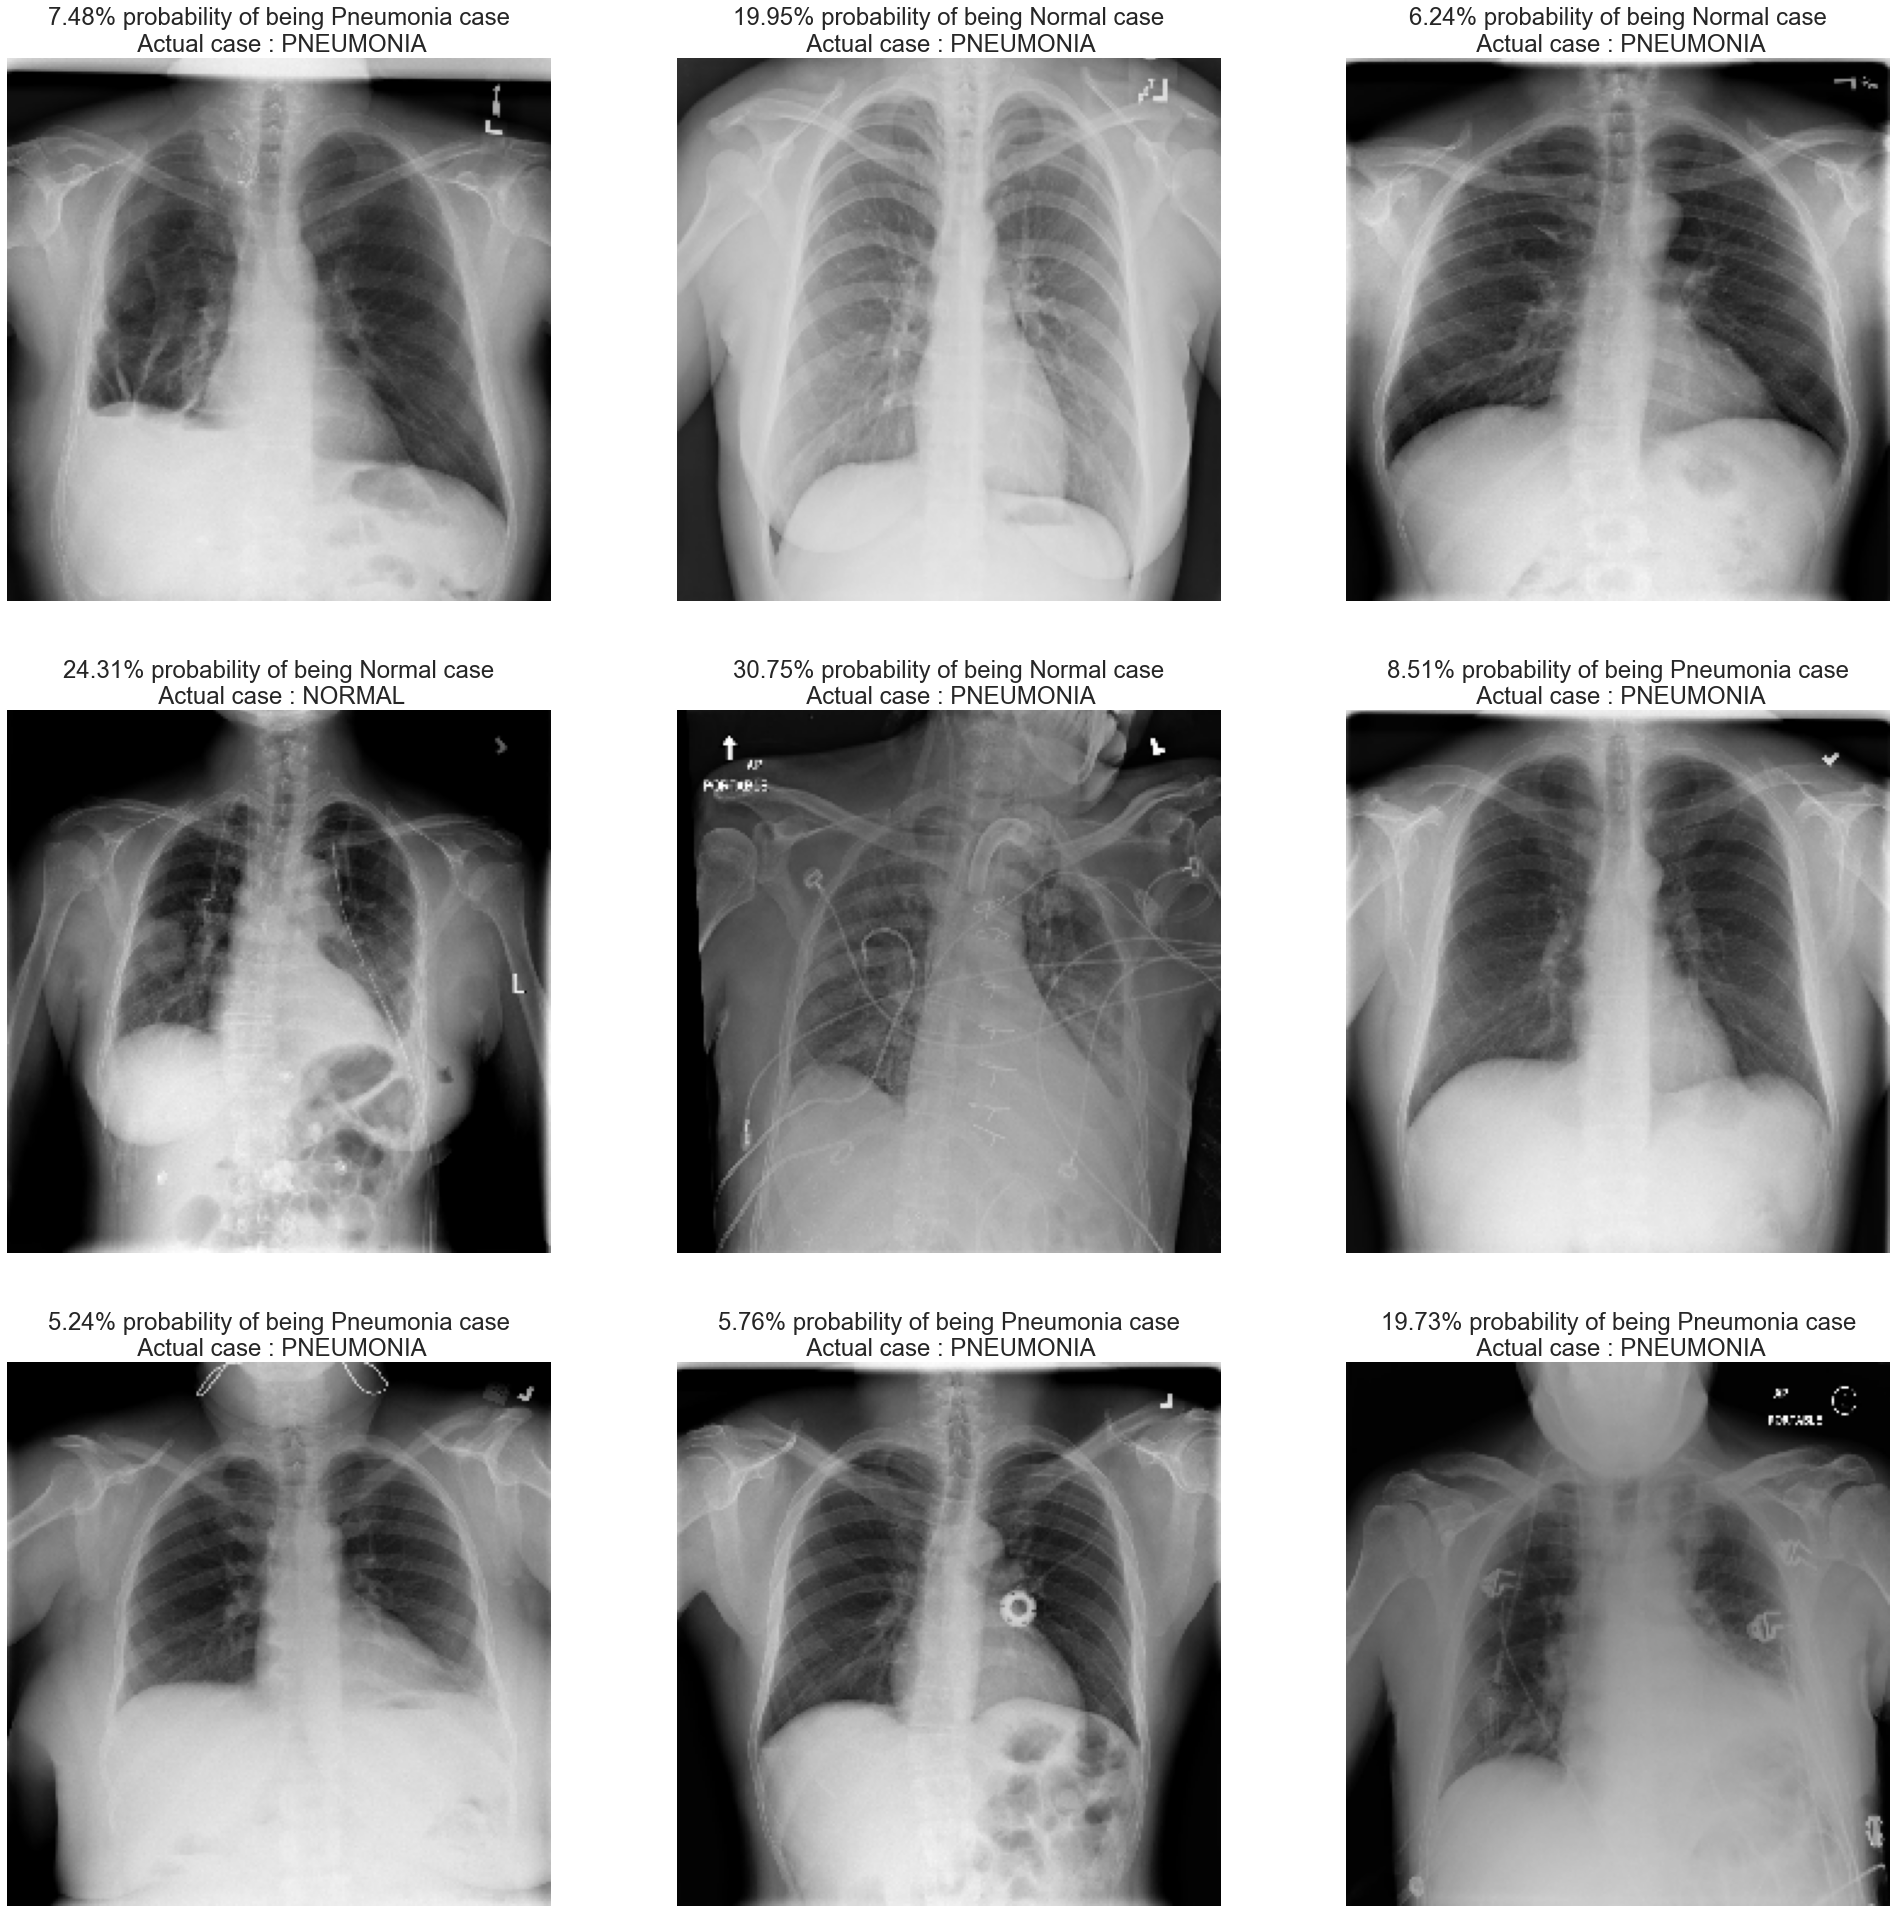

In [41]:
test_class.reset()
x=np.concatenate([test_class.next()[0] for i in range(test_class.__len__())])
y=np.concatenate([test_class.next()[1] for i in range(test_class.__len__())])

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(34, 34))
for i in range(0+224, 9+224):
    plt.subplot(3, 3, (i-224)+1)
    if prediction[i, 0] >= 0.5: 
        out = ('{:.2%} probability of being Pneumonia case'.format(prediction[i][1]))    
    else: 
        out = ('{:.2%} probability of being Normal case'.format(1-prediction[i][1]))
    plt.title(out+"\n Actual case : "+ dic.get(y[i][0])) 
    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')
plt.show()

source: https://www.kaggle.com/code/abhishekdhule/pneumonia-detection-resnet-inception-tensorflow?scriptVersionId=40311825